# Select Python code to demonstrate data loading, analysis, wrangling, cleansing, visualization and inference

In [1]:
# some code is repeated to place emphasis on certain libraries / functionality discussed during lecture
import pandas as pd #data objects
import numpy as np # numerics
import seaborn as sns # visuals
import scipy as sp # stats

In [2]:
data = pd.Series([0.5, 0.35, 0.75, 1.0])
data

0    0.50
1    0.35
2    0.75
3    1.00
dtype: float64

In [3]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
data.values

array([ 0.5 ,  0.35,  0.75,  1.  ])

In [5]:
print (data[1], '\n', data[1:3] )

0.35 
 1    0.35
2    0.75
dtype: float64


In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [8]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

In [9]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [10]:
pd.Series({2:'a', 1:'b', 3:'c'})

1    b
2    a
3    c
dtype: object

In [11]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

In [12]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [13]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [14]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [15]:
#A DataFrame is a collection of Series objects, and a single-column DataFrame can be constructed from a single Series:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [16]:
# lists to dictionaries
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [17]:
# NaN indicates missing values. Pandas autofills NaN elements
df = pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])
df

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


# Dropping missing values

In [18]:
df.dropna()

,a,b,c


In [19]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [20]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [21]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [22]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


# Filling null values

In [23]:
print (df)
df.fillna(method='ffill', axis=1)

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [24]:
?df.fillna

# Combining datasets

In [25]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [26]:
#class to display multiple DataFrames side by side.
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [27]:
# in numpy we can concatenate arrays as shown:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
#in pandas we use concat:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [29]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [30]:
?display
?pd.concat

In [31]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

In [32]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [33]:
# adding multiple indices 
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

In [34]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [35]:
'''By default, the entries for which no data is available are filled with NA values. 
To change this, we can specify one of several options for the join and
join_axes parameters of the concatenate function. 
By default, the join is a union of the input columns (join='outer'), 
but we can change this to an intersection of the columns using join='inner':'''

display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [36]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


# Working with larger datasets

In [37]:
import seaborn as sns

In [38]:
titanic = sns.load_dataset('titanic')

In [39]:
titanic.shape

(891, 15)

In [40]:
titanic.values

array([[0, 3, 'male', ..., 'Southampton', 'no', False],
       [1, 1, 'female', ..., 'Cherbourg', 'yes', False],
       [1, 3, 'female', ..., 'Southampton', 'yes', True],
       ..., 
       [0, 3, 'female', ..., 'Southampton', 'no', False],
       [1, 1, 'male', ..., 'Cherbourg', 'yes', True],
       [0, 3, 'male', ..., 'Queenstown', 'no', True]], dtype=object)

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [42]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
titanic.mean() # mean on columns

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [44]:
titanic.mean(1) # mean on rows

0       4.281250
1      14.035412
2       4.865625
3      11.387500
4       6.006250
5       1.922614
6      13.607812
7       3.759375
8       5.516662
9       6.008850
10      3.337500
11     10.943750
12      4.131250
13     10.034375
14      3.231775
15      9.375000
16      4.890625
17      2.571429
18      6.625000
19      1.746429
20      8.125000
21      6.500000
22      3.503650
23      8.437500
24      4.509375
25      9.923438
26      1.746429
27     36.125000
28      1.839886
29      1.842257
         ...    
861     4.562500
862     9.616150
863    11.792857
864     5.125000
865     7.375000
866     5.607287
867    10.561975
868     2.071429
869     2.641662
870     4.861975
871    12.944275
872     5.125000
873     7.625000
874     7.000000
875     3.403125
876     4.355725
877     3.986975
878     1.842257
879    17.769787
880     6.875000
881     5.736975
882     4.564588
883     5.312500
884     4.631250
885     9.515625
886     5.500000
887     6.500000
888     4.2071

# Running a query using specific criteria

In [45]:
titanic[
    (titanic.sex == 'female')
    & (titanic['class'].isin(['First', 'Third']))
    & (titanic.age > 30)
    & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
254,0,3,female,41.0,0,2,20.2125,S,Third,woman,False,NaN,Southampton,no,False
276,0,3,female,45.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,no,True
362,0,3,female,45.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
396,0,3,female,31.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,no,True
503,0,3,female,37.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,no,True


# Merging

In [46]:
# Generate a small DataFrame of cities with their population, 
# and fake ages (years with the city status)
towns_dic = {
    'name': ['Southampton', 'Cherbourg', 'Queenstown', 'Montevideo'],
    'country': ['United Kingdom', 'France', 'United Kingdom', 'Uruguay'],
    'population': [236900, 37121, 12347, 1305000],
    'age': [np.random.randint(500, 1000) for _ in range(4)]
}
towns_df = pd.DataFrame(towns_dic)

In [47]:
(titanic.merge(
  towns_df, 
  left_on='embark_town', right_on='name', 
  how='left',
  indicator=True,
  suffixes=('_passenger', '_city')
)).head()


,survived,pclass,sex,age_passenger,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_city,country,name,population,_merge
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,670.0,United Kingdom,Southampton,236900.0,both
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,764.0,France,Cherbourg,37121.0,both
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,670.0,United Kingdom,Southampton,236900.0,both
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,670.0,United Kingdom,Southampton,236900.0,both
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,670.0,United Kingdom,Southampton,236900.0,both


# Grouping and sizing

In [48]:
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elder']
age_groups = pd.cut(titanic.age, bins, labels=labels)
titanic['age_group'] = age_groups

In [49]:
groups = titanic.groupby(['age_group', 'alone'])
groups.size()

age_group  alone
child      False     67
           True       2
teenager   False     23
           True      21
adult      False    216
           True     363
elder      False      4
           True      18
dtype: int64

In [50]:
 100 * groups.size() / len(titanic)

age_group  alone
child      False     7.519641
           True      0.224467
teenager   False     2.581369
           True      2.356902
adult      False    24.242424
           True     40.740741
elder      False     0.448934
           True      2.020202
dtype: float64

In [51]:
p_titanic = titanic.drop_duplicates('age').pivot(index='age', columns='class', values='fare')
p_titanic.tail(3)

class,First,Second,Third
age,,,
71.0,34.6542,NaN,NaN
74.0,NaN,NaN,7.775
80.0,30.0000,NaN,NaN


In [52]:
pt_titanic = titanic.pivot_table(index='age', columns='class', values='fare')
pt_titanic.tail(3)

class,First,Second,Third
age,,,
71.0,42.0792,NaN,NaN
74.0,NaN,NaN,7.775
80.0,30.0000,NaN,NaN


# Creating Pivot Tables

In [53]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [54]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [55]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [56]:
# Multilevel pivot tables
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

# Plotting and visualizing distributions and correlations
## Pandas with Seaborn

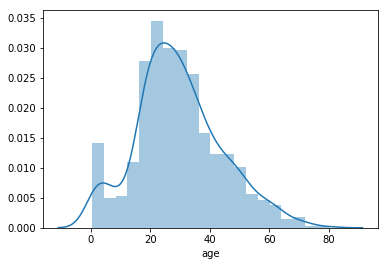

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.distplot(titanic.age.dropna())
plt.show()

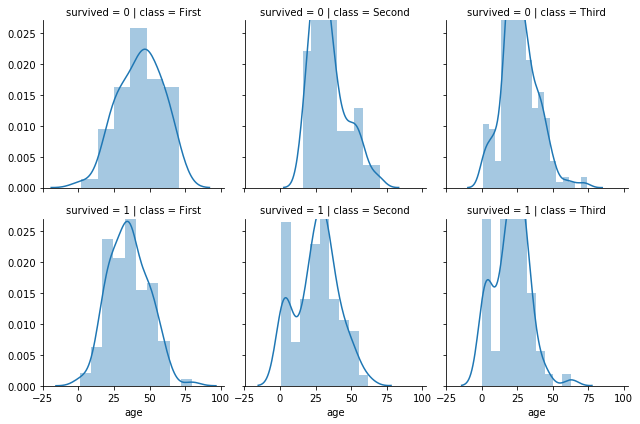

In [58]:
g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, "age")
plt.show()

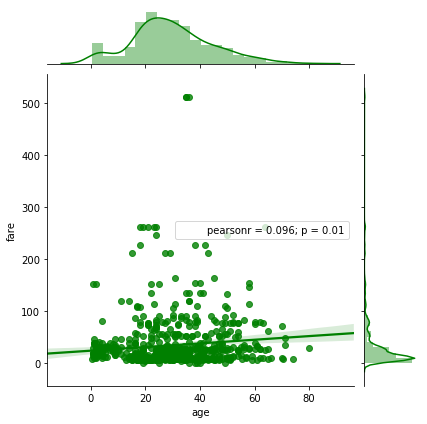

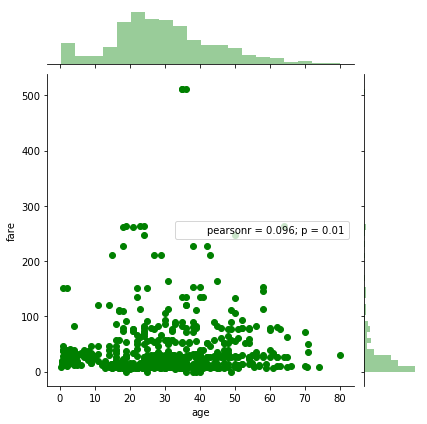

In [59]:
''' Display data points according to two variables, both their distributions and kernel density estimators.

Kernel density estimation (KDE) is a non-parametric way to estimate the 
probability density function of a random variable. 
Kernel density estimation is a fundamental data smoothing problem where 
inferences about the population are made, based on a finite data sample.

There appears to be almost no correlation between the variables “age” and “fare”, 
as shown by the Pearson correlation coefficient.
'''

sns.jointplot(data=titanic, x='age', y='fare', kind='reg', color='g')
plt.show()

sns.jointplot(data=titanic, x='age', y='fare', color='g')
plt.show()

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
?sns.heatmap

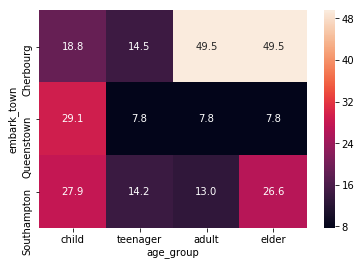

In [62]:
# Show an Annotated heatmap of the paid fares' median by groups of passengers

df = titanic.pivot_table(index='embark_town', columns='age_group', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")

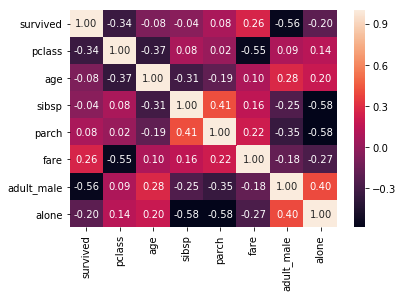

In [63]:
# Heatmap of the correlation matrix

sns.heatmap(titanic.corr(), annot=True, fmt=".2f")

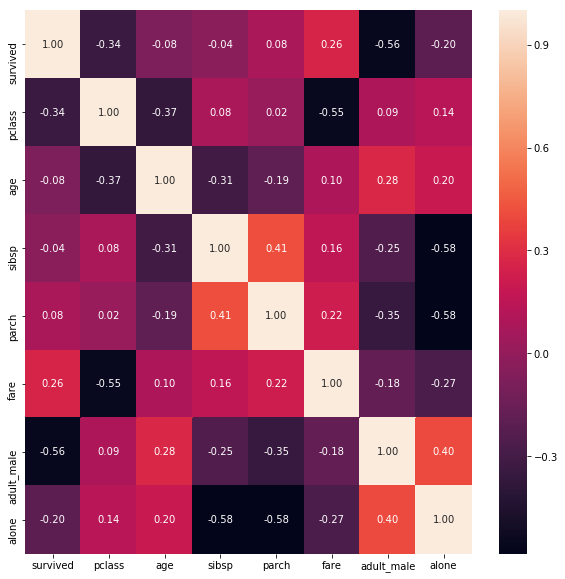

In [64]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(titanic.corr(), annot=True, fmt=".2f")

In [65]:
# Sample the data

df = titanic.sample(frac=0.1, replace=True)
print(titanic.info(), df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
age_group      714 non-null category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 212 to 2
Data columns (total 16 columns):
survived       89 non-null int64
pclass         89 non-null int64
sex            89 non-null object
age            68 non-null float64
sibsp      

In [66]:
?titanic.sample

# Inference testing

In [67]:
from scipy import stats
from pandas import plotting

df = pd.read_csv('c:/000Data/titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002260E802F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002260F1A3390>]], dtype=object)

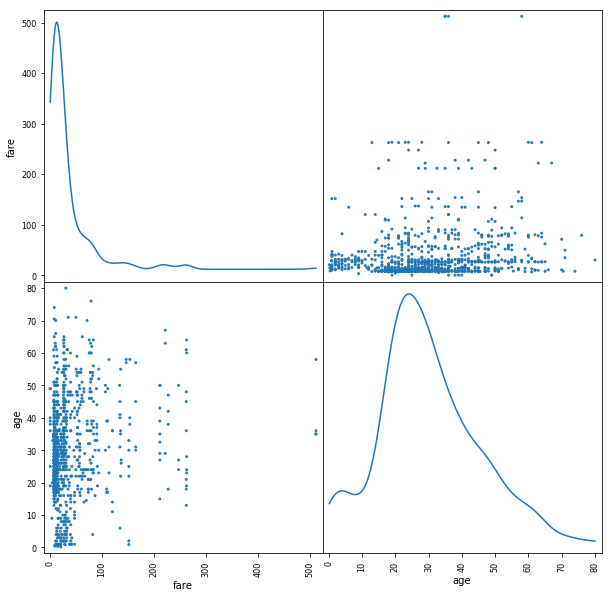

In [68]:
plotting.scatter_matrix(df[[ 'fare', 'age']], alpha=12, figsize=(10, 10), diagonal='kde') 

# Hypothesis testing

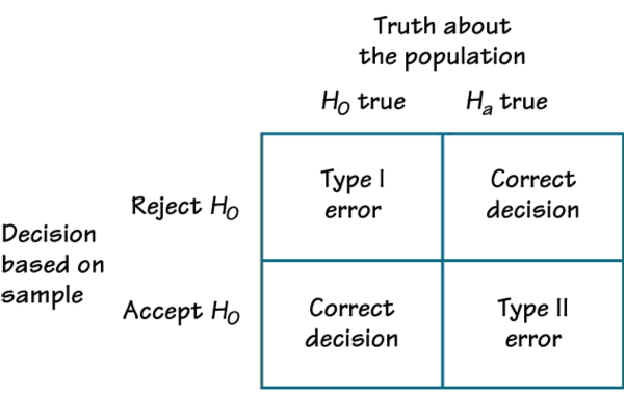

In [69]:
from scipy import stats

data = pd.read_csv('c:/000Data/brain_size.csv', sep=';', na_values=".")
print (data.shape)
data.head()

(40, 8)


,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
Unnamed: 0    40 non-null int64
Gender        40 non-null object
FSIQ          40 non-null int64
VIQ           40 non-null int64
PIQ           40 non-null int64
Weight        38 non-null float64
Height        39 non-null float64
MRI_Count     40 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.6+ KB


In [71]:
groupby_gender = data.groupby('Gender')

for gender, value in groupby_gender['VIQ']:
        print((gender, value.mean()))
        
groupby_gender.mean()

('Female', 109.45)
('Male', 115.25)


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002260E991860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002260F8D1588>]], dtype=object)

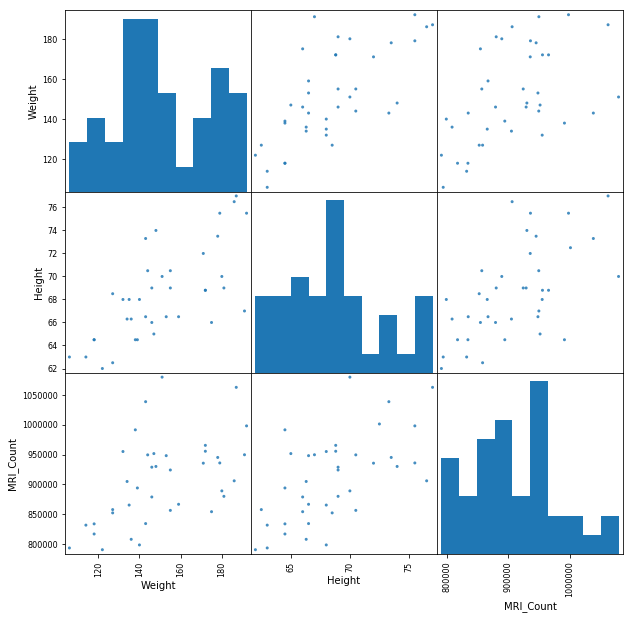

In [72]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']], alpha = 45, figsize=(10, 10)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002260F921B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002260FF45358>]], dtype=object)

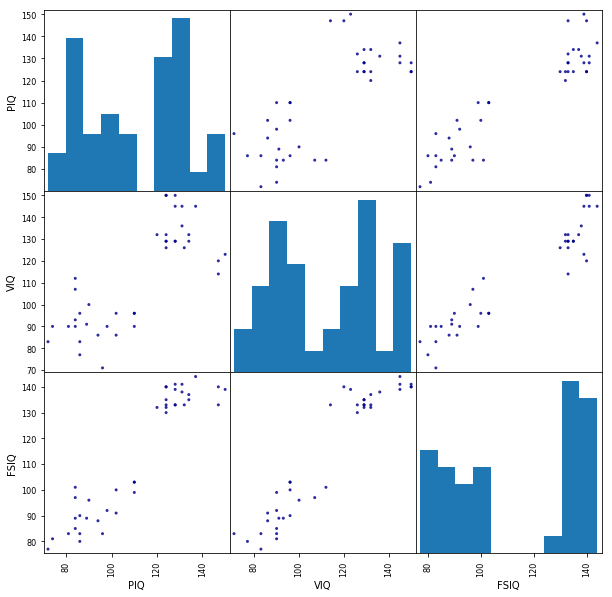

In [73]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']], alpha = 45, figsize=(10, 10), color = 'DarkBlue')

In [74]:
# We can use the t-test to test whether the mean of our sample differs 
# in a statistically significant way from the theoretical expectation.

print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(data['PIQ'], 0))

t-statistic = 31.248 pvalue = 0.0000


In [75]:
# 1-sample t-test: testing the value of a population mean
# tests if the population mean of data is likely to be equal to a given value (0 in this case) 

stats.ttest_1samp(data['VIQ'], 0)

# p is 10^-28 , still not 0.

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [76]:
# 2-sample t-test: testing for difference across populations
# test if this is significant, we do a 2-sample t-test
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

In [77]:
# Test the Null hypothesis that 'ViQ' have a Skew and Kyrtosis of a normal distribution

# Test if skew and kurtosis of our sample differ significantly from those of a normal distribution

x = data['VIQ']
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(x))
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(x))

normal skewtest teststat =  0.208 pvalue = 0.8351
normal kurtosistest teststat = -3.861 pvalue = 0.0001


In [78]:
# These skew and kurtosis tests are combined in the normality test
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(x))

normaltest teststat = 14.949 pvalue = 0.0006


In [79]:
# In all three tests the p-values are very low and we can 
#  reject the hypothesis that the our sample has skew and kurtosis of the normal distribution.

# Since skew and kurtosis of our sample are based on central moments, 
#  we get exactly the same results if we test the standardized sample:

print('normaltest teststat = %6.3f pvalue = %6.4f' %stats.normaltest((x-x.mean())/x.std()))

# Conclusion: because of p being very close to 0, we reject the hypothesis of normality

normaltest teststat = 14.949 pvalue = 0.0006


In [80]:
# Plotting distributions

data = pd.read_csv('c:/000Data/brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


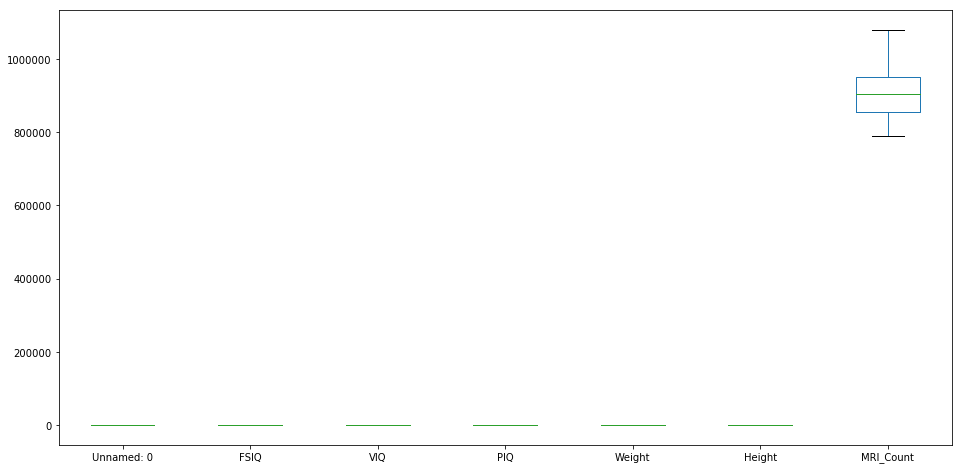

In [81]:
data.plot(kind='box', figsize=[16,8])

In [82]:
# remove the column with high values to see others
data2 = data.drop('MRI_Count', 1)
data2.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height
0,1,Female,133,132,124,118.0,64.5
1,2,Male,140,150,124,NaN,72.5
2,3,Male,139,123,150,143.0,73.3
3,4,Male,133,129,128,172.0,68.8
4,5,Female,137,132,134,147.0,65.0


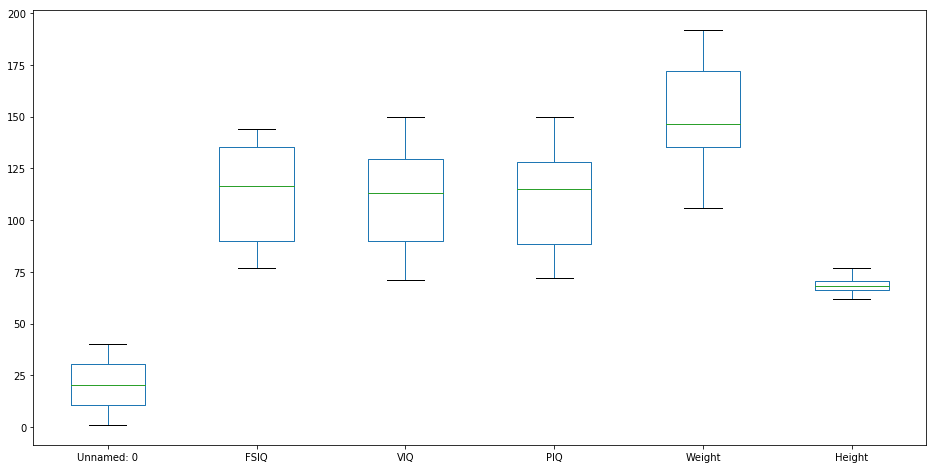

In [83]:
data2.plot(kind='box', figsize=[16,8])

In [84]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

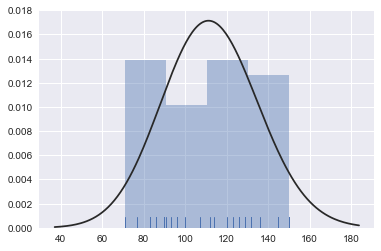

In [85]:
import seaborn as sns
sns.set(color_codes=True)
x = data.as_matrix(['VIQ'])
sns.distplot(x, kde=False, fit=stats.gamma)
sns.rugplot(x)

In [86]:
datanp =  data.as_matrix(['VIQ'])
datanp[:5]

array([[132],
       [150],
       [123],
       [129],
       [132]], dtype=int64)

In [ ]:
'''
Scipy Statistics - Become familiar with functions listed here:
https://docs.scipy.org/doc/scipy/reference/stats.html

Notebook code partially adapted from 
https://github.com/donnemartin/data-science-ipython-notebooks/blob/565136cd4a1577a3c2e6722a80158d70bc4b19bf/pandas/03.01-Introducing-Pandas-Objects.ipynb 
https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/
https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html 
https://pandas.pydata.org/pandas-docs/stable/visualization.html
https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html 
https://www.analyticsvidhya.com/blog/2017/01/comprehensive-practical-guide-inferential-statistics-data-science/
http://www.scipy-lectures.org/packages/statistics/index.html#hypothesis-testing-comparing-two-groups
https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
https://elitedatascience.com/python-seaborn-tutorial
'''